In [24]:
from __future__ import annotations

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform
import math
from typing import Tuple, Collection
from src import *


# Steps

Loading data

In [79]:
df = pd.read_csv("../mio1/regression/steps-large-training.csv")
X = np.asarray(df["x"])
y = np.asarray(df["y"])

Creating MLP in architecture with (1, 5, 1) (we don't need more for this task) and proper weights.

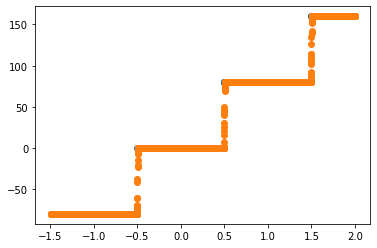

In [81]:
layers = [LinearLayer(1, 5, weights=np.asarray((1000,1000,1000,0, 0)).reshape(1,5), bias_values=np.asarray((500,-500,-1500,0, 0)).reshape(5)),
          sigmoid,
          LinearLayer(5, 1, weights=np.asarray((80,80,80, 0, 0)).reshape(5,1), bias_values=np.asarray(-80).reshape(1)),
          ]
net = MLP(layers)
plt.scatter(X, y)
plt.scatter(X, net(X))

As we can see the network approximates the target function almost perfectly.

In [84]:
mse(y, net(X))

2.090984203763538

MSE is pretty low and we could make it arbitrarily small by increasing weights with constant bias/weight ratio

# Square

In [85]:
df = pd.read_csv("../mio1/regression/square-simple-training.csv")
X = np.asarray(df["x"])
y = np.asarray(df["y"])

Loadig weights into (1, 5, 5, 1) architecture, as smaller doesn't work.

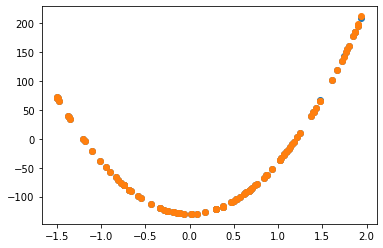

In [86]:
layers = [LinearLayer(1, 5, weights=np.asarray([[ -5.3381],
                                                [ -1.2753],
                                                [ -4.3002],
                                                [-21.0019],
                                                [ -8.5443]]).T,
                      bias_values=np.asarray([ 1.4595, -2.0847,  5.3267, 42.6468, 16.2957])),
          sigmoid,
          LinearLayer(5, 5, weights=np.asarray([[ 10.5775,  -2.8416,   1.5680,  16.8754,  -2.9224],
                                                [  2.3616, -16.7397,   7.5676,   3.1040,   3.5625],
                                                [  2.2611, -20.8859,   3.0553,   7.7675,   6.8939],
                                                [  6.7120, -25.3992,   6.7228,   4.9615,   5.7341],
                                                [  6.9819, -31.3709,  10.4192,   5.9040,   7.1255]]).T,
                      bias_values=np.asarray([-14.7321, -13.1291, -13.0058, -13.1236, -14.0321])),
          sigmoid,
          LinearLayer(5, 1, weights= np.asarray([[-56.2364, -99.7419, -75.8010, -77.9080, -73.2831]]).T, bias_values= np.asarray([227.5033]))
          ]
net = MLP(layers)
plt.scatter(X, y)
plt.scatter(X, net(X))

In [87]:
mse(net(X), y)

0.13445663839047742

MSE is pretty low there too.